In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

paises = ("Alemania", "España", "Francia", "Portugal")
posicion_y = np.arange(len(paises))
unidades = (342, 321, 192, 402)
plt.barh(posicion_y, unidades, align = "center")
plt.yticks(posicion_y, paises)
plt.xlabel('Unidades vendidas')
plt.title("Ventas en Europa")


In [2]:
import sqlite3
conn = sqlite3.connect('../sql/producto.db')

c = conn.cursor()
print ('base de datos conectada')

base de datos conectada


In [ ]:
hey
git reset --hard HEAD~1
Eduardo Carrera20:51
eduardocarhue@gmail.com
Eduardo Carrera21:29
git clone https://github.com/anapao07/customer-project.git
Eduardo Carrera21:32
1.- Clona repositorio
2.- Validar que el repositorio este limpio
3.- Crear un branch "develop_ana"
4.- Crear un archivo python que imprima algo
5.- Empujar (push) branch a github 
6.- Avisarme <3


Eduardo Carrera21:34
7.- Jalar (pull) Branch "develop_ana" y testear (cambiar a ese branch y ver que funcione el nuevo archivo)
8.- Merge (unir) develop_ana con el master (branch) 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc94d731da0>)

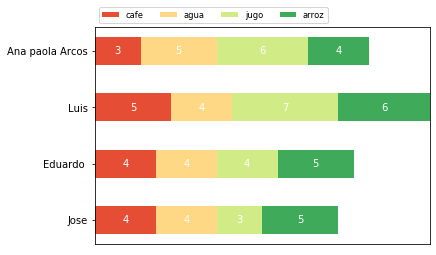

In [8]:
import numpy as np
import matplotlib.pyplot as plt

c.execute("select nombre from customer")
nombres = c.fetchall()

c.execute("select nombre from producto")
category_names = c.fetchall()

co = c.execute("SELECT nombre FROM customer")
lab = c.fetchall()

nombres = lab

can = c.execute('select id value from customer').fetchall()
co = c.execute("SELECT nombre FROM customer")
lab =c.fetchall()
nombres =lab


conn.row_factory = lambda cursor, row: row[0]
can = c.execute('select id  from customer').fetchall()
cantidad_producto = {}
i = 0

for ids in can:
    sent = """select p.cantidad from custom_prod 
    AS cp left join customer as c on c.id = cp.customer_id 
    left join producto as p on cp.product_id = p.id where c.id= ?;"""
    c.execute(sent, [ids])
    cantidad = c.fetchall()
    cantidad_producto[nombres[i]]=cantidad
    i+=1
    
results = cantidad_producto

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots()
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
     
    plt.savefig("../static/image/productsbarras.png")
    return fig, ax 

survey(results, category_names)

In [20]:
results

{'Ana paola Arcos': [3, 5, 6, 4],
 'Luis': [5, 4, 7, 6],
 'Eduardo ': [4, 4, 4, 5],
 'Jose': [4, 4, 3, 5]}

In [18]:
can

[4, 5, 9, 13]

[4, 4, 3, 5, 7, 6, 4, 7, 5, 6]
['cafe', 'agua', 'jugo', 'arroz', 'Leche', 'pan', 'jabón', 'Te', 'chocolate', 'atun']


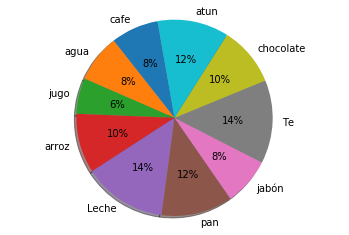

In [4]:
import matplotlib.pyplot as plt

conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
cantidad = c.execute('select cantidad value from producto').fetchall()

print(cantidad)
c = c.execute("SELECT nombre FROM producto")
lab =c.fetchall()
print(lab)
        
sizes = cantidad
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=lab,autopct='%1.0f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  
plt.show()



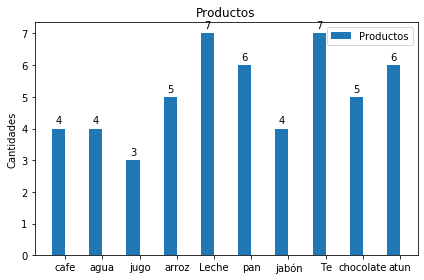

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
cantidad = c.execute('select cantidad value from producto').fetchall()
c = c.execute("SELECT nombre FROM producto")
lab =c.fetchall()
labels = lab
products = cantidad
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, products, width, label='Productos')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidades')
ax.set_title('Productos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
    xy=(rect.get_x() + rect.get_width() / 2, height),
    xytext=(0, 3),  # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')
    fig.tight_layout()
    plt.savefig("../static/image/productsb.png")



In [ ]:
  sentencia = "DELETE FROM producto WHERE id = ?;"
        c.execute(sentencia, [id])